In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 19 2023

@author: Chunho Lee
"""
#%%
from __future__ import division, print_function, absolute_import
import numpy as np
from numpy import sqrt, pi, cos, sin, log, exp, sinh
from phidl import Device, Layer, LayerSet, device_layout, Path, CrossSection, Device
from phidl import quickplot as qp
import phidl.geometry as pg
import phidl.routing as pr
import phidl.utilities as pu
import phidl.path as pp
from phidl import quickplot as qp
import bezier
import math
import sys
import os
import math
sys.path.append(os.path.abspath(r"/Users/kamilakunes/Desktop/MJLab/Chunho_lib_240919"))
from Chunho_lib_111723_airsuspended import *
from Chunho_lib_111723_electrodes import *
from Chunho_lib_111723_heaters import *
from Chunho_lib_111723_markers import *
from Chunho_lib_111723_waveguides import *

In [2]:
ls = LayerSet() # Create a blank LayerSet
ls.add_layer(name = 'label', gds_layer = 1, gds_datatype = 0,
             description = 'General label', color = 'deeppink')
ls.add_layer(name = 'marker', gds_layer = 2, gds_datatype = 0,
             description = 'EBL marker', color = 'firebrick')
ls.add_layer(name = 'grating', gds_layer = 3, gds_datatype = 0,
             description = 'bragg_grating', color = 'darkturquoise')
ls.add_layer(name = 'wg', gds_layer = 4, gds_datatype = 0,
             description = 'LN wg', color = 'dodgerblue')
ls.add_layer(name = 'ring', gds_layer = 5, gds_datatype = 0,
             description = 'LN ring', color = 'deepskyblue')
ls.add_layer(name = 'gold1', gds_layer = 6, gds_datatype = 0,
             description = 'Gold electrode', color = 'gold')
ls.add_layer(name = 'via', gds_layer = 7, gds_datatype = 0,
             description = 'hole', color = 'grey')
ls.add_layer(name = 'gold2', gds_layer = 8, gds_datatype = 0,
             description = '2nd Gold electrode', color = 'goldenrod')
ls.add_layer(name = 'nicr', gds_layer = 9, gds_datatype = 0,
             description = 'heater', color = (0.4,0.5,0.7))
ls.add_layer(name = 'test', gds_layer = 10, gds_datatype = 0,
             description = 'alignment', color = 'lime')
ls.add_layer(name = 'mc', gds_layer = 11, gds_datatype = 0,
             description = 'mode converter', color = 'mediumblue')
ls.add_layer(name = 'detch', gds_layer = 12, gds_datatype = 0,
             description = 'deep etch', color = 'orangered')

pu.write_lyp('my_layer_properties_file.lyp', layerset = ls)

layer_label =  ls['label']
layer_marker = ls['marker']
layer_grating = ls['grating']
layer_wg = ls['wg']
layer_ring = ls['ring']
layer_metal = ls['gold1']
layer_via = ls['via']
layer_metal2 = ls['gold2']
layer_heater = ls['nicr']
layer_test = ls['test']
layer_MC = ls['mc']
layer_Detch = ls['detch']

c0=299792458

In [3]:
# parameters
radius_wg = 200
wg_single = 0.4
wg_taper = 1
taperlength1 = 200 #General tapering

mod_turnangle = 90


step=100
GSG_offset=1850

#ModSegElec
# Probepoint=100
mod_l = 10000
period=50

gap_body1=1.9
edge_width1=6.25
edge_width2=0.5
center_width1=edge_width1
center_width2=0.5
edge_length1=0.5
center_length1=0.5
edge_length2=45
center_length2=45

#ModWG
pad_w=150
signal_body_w=32
gap_body2=gap_body1+(edge_width1+edge_width2)*2
turn_length1=106
ngrp=2.252

padoffset=225

#heater length
heaterlength1 = 300 #heaterlength
heaterwidth1= 7

#metalwiring
wirewidth=30
Edgepad_yoffset1=2500

heightoffset=250
inputoffset=10

# #termination
# taper_l1=50
# signal_end_w1=240
# bar_l1=160
# bar_w1=10

#testrings
Tring_radius=150
Tring_bend_radius=180
Tring_wg_single=0.8
Tring_wg_ring=1.5
Tring_step1=35
Tring_step2=65
Tring_dev_pitch_j2=500
Tring_xoffset1=-18000+200-530-150+250
Hpath1=2000-50


Tring_wgcp2 = np.array([
    [0.7 for x in range(1)],
    [0.8 for x in range(1)],
    [0.9 for x in range(1)],
    [0.9 for x in range(1)]]
)

#ring with electrodes
Tring_wg_ring2=2

#Facet length
facet_length1=1000
facet_width1=7
facet_offset=250


D = Device()
chip_sizex=19500
chip_sizey=6500

dev_pitch_j = 500
dev_pitch_i = 2600
# step=350

num_i = 1
num_j = 1

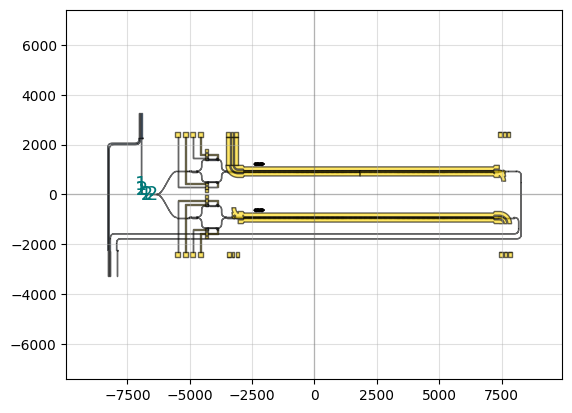

In [4]:
for ii in range(0,num_i):
    for jj in range(0, num_j):
        D1 = Device()
        D2 = Device()
        D3 = Device()
        D4 = Device()
        D5 = Device()
        D6 = Device()
        D7 = Device()
        D8 = Device()
        D9 = Device()
        D10 = Device()
        D11 = Device()
        D12 = Device()
        D13 = Device()
        D14 = Device()
        D15 = Device()
        D16 = Device()
        D17 = Device()
        D18 = Device()
        D19 = Device()
        D20 = Device()
        # generate device
        
        #Global Crosssections
        cross_section = CrossSection().add(width = wg_single, offset = 0, layer = layer_wg, ports = ['1','2'])
        left_turn = pp.euler(radius = radius_wg, angle = 90, p = 0.5, use_eff = True, num_pts = 5000)
        right_turn = pp.euler(radius = radius_wg, angle = -90, p = 0.5, use_eff = True, num_pts = 5000)

        cross_section_single = CrossSection().add(width = wg_single, offset = 0,  name = 'wg', layer = layer_wg, ports = ['1','2'])
        cross_section_facet = CrossSection().add(width = facet_width1, offset = 0,  name = 'wg', layer = layer_wg, ports = ['1','2'])
        
        cross_section_multi= CrossSection().add(width = wg_taper, offset = 0, name = 'wg', layer = layer_wg, ports = ['1','2'])
            
        PositiveTaper1 = pp.transition(cross_section1 = cross_section_single, cross_section2 = cross_section_multi, width_type = 'linear')
        NegativeTaper1 = pp.transition(cross_section1 = cross_section_multi, cross_section2 = cross_section_single, width_type = 'linear')

            

        #Define global  passes
        Taperpath1= pp.straight(length = (taperlength1))
        left_turn1 = pp.euler(radius = radius_wg, angle = 90, p = 0.5, use_eff = True, num_pts = 5000)
        right_turn1 = pp.euler(radius = radius_wg, angle = -90, p = 0.5, use_eff = True, num_pts = 5000)
        heaterpath1=pp.straight(length = (heaterlength1+100))


        def Optical_DAC_towardtop_v1(mod_l=10000, outputoffset=100):
            
            D = Device('test')
            D1 = Device()
            D2 = Device()
            D3 = Device()

            mod_l=mod_l


            num_mid=int(mod_l//period)

            #Cascadepitch
            pitch1=pad_w+(signal_body_w+gap_body2)*2



            # AM
            AMWG1= D.add_ref(Mod_WG_v2(wg_width= wg_taper, pad_w=pad_w,signal_body_w=signal_body_w,gap_body=gap_body2,mod_l = mod_l,layer=layer_wg)[0])
            

            Mod_mid= D1.add_ref(Mod_SegElec(pad_w=pad_w, signal_body_w=signal_body_w, gap_body=gap_body1,  period=period, num_i=num_mid, layer = layer_metal, edge_width1=edge_width1, edge_width2=edge_width2, center_width1=center_width1, center_width2=center_width2, edge_length1=edge_length1, center_length1=center_length1, edge_length2=edge_length2, center_length2=center_length2))
            Mod_mid.connect('center_up', AMWG1.ports['center_down'])
            
            #tapered facet
            Mod_mid_facet_input= D1.add_ref(GSGfacet(taper_l=35,pad_w=pad_w, signal_end_w=100, signal_body_w=signal_body_w,gap_end=43,gap_body=14, facet_width=200, layer =layer_metal))
            Mod_mid_facet_input.connect('lm', Mod_mid.ports['lm'])
            Mod_mid_facet_output= D1.add_ref(GSGfacet(taper_l=35,pad_w=pad_w, signal_end_w=100, signal_body_w=signal_body_w,gap_end=43,gap_body=14, facet_width=200, layer =layer_metal))
            Mod_mid_facet_output.connect('lm', Mod_mid.ports['rm'])

            #Curved GSG
            left_Curve_mid= D1.add_ref(GSG_turnright(radius=pitch1+250, pad_w=pad_w, signal_body_w=100, gap_body=43, layer = layer_metal))
            left_Curve_mid.connect('m1', Mod_mid_facet_input.ports['rm'])

            right_Curve_mid= D1.add_ref(GSG_turnleft(radius=pitch1+250, pad_w=pad_w, signal_body_w=100, gap_body=43, layer = layer_metal))
            right_Curve_mid.connect('m1', Mod_mid_facet_output.ports['rm'])

            Union_electrode = D2.add_ref(pg.union(D1, by_layer = False, layer = layer_metal))
            D.add_ref(D2)

            
            #AM asymmetric path

            #AM asymmetric path
            offset=700  
            offsetpath1= pp.straight(length = (offset))

            AM_armtop_turn0= D.add_ref(Path().append([offsetpath1]).extrude( cross_section_multi)).connect('2', AMWG1.ports['lt'])
            AM_armbot_turn0= D.add_ref(Path().append([offsetpath1]).extrude( cross_section_multi)).connect('2', AMWG1.ports['lb'])

            
            AM_armtop_turn1 = D.add_ref(Path().append([
            left_turn, pp.straight(length = turn_length1/2), right_turn, heaterpath1,right_turn, pp.straight(length = turn_length1/2), left_turn
            ]).extrude(cross_section_multi)).connect('2', AM_armtop_turn0.ports['1'])

            AM_armbot_turn1 = D.add_ref(Path().append([
            right_turn, left_turn, heaterpath1,left_turn, right_turn
            ]).extrude(cross_section_multi)).connect('2', AM_armbot_turn0.ports['1'])

            AM_armtop_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armtop_turn1.ports['1'])
            AM_armbot_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armbot_turn1.ports['1'])

            AM_armtop_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rt'])
            AM_armbot_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rb'])
            
            
            
            Ysplit_l=D.add_ref(Ysplitter_left(wg_width1=wg_single,
                                                splitter_length=taperlength1*1,
                                                modulator_pitch=(gap_body2+signal_body_w)*1,
                                                layer=layer_wg
                                            )).connect(port = 'out1', destination = AM_armtop_input1.ports['1']).move([0, 0])

            Ysplit_r=D.add_ref(Ysplitter_right(wg_width1=wg_single,
                                                splitter_length=taperlength1*2,
                                                modulator_pitch=(gap_body2+signal_body_w)*1,
                                                layer=layer_wg
                                            )).connect(port = 'in1', destination = AM_armtop_output1.ports['2']).move([0, 0])
            
            

            AM_arm_output2= D.add_ref(Path().append([
            Taperpath1, pp.straight(length = (outputoffset))
            ]).extrude(PositiveTaper1)).connect('1', Ysplit_r.ports['out1'])

            AM_arm_output3= D.add_ref(Path().append([
            right_turn1, pp.straight(length = (heightoffset))
            ]).extrude(cross_section_multi)).connect('1', AM_arm_output2.ports['2'])


            # heaters
            # heaters

            heater1= D.add_ref(heater_straight_offaxis_formodulator( ht_width=heaterwidth1, ht_length=heaterlength1,offset= 180, layer1=layer_heater, layer2=layer_metal))
            heater1.mirror((0,1))
            heater1.x=(AM_armtop_turn1.x)
            heater1.ymin=(AM_armtop_turn1.ymax-wg_taper/2-heaterwidth1/2)
            # heater1.movey(-15)

            heater2= D.add_ref(heater_straight_offaxis_formodulator_v2( ht_width=heaterwidth1, ht_length=heaterlength1,offset= 180, layer1=layer_heater, layer2=layer_metal))
            heater2.mirror((0,1))
            heater2.x=(AM_armbot_turn1.x)
            heater2.ymax=(AM_armbot_turn1.ymin+wg_taper/2+heaterwidth1/2)

        
            temp1=200
            text0 = '3Bit_OptDAC_modl'+ str(round(mod_l, 4))
            text1 = 'Electrode gap' + str(round(gap_body1, 4))+'H' + str(round(edge_width1, 4))+'ngrp' + str(round(ngrp, 4))
            text2 = 'Asympath ' + str(round(turn_length1, 4))+'& WGwidth ' + str(round(wg_taper, 4))
            text3 = '^'

            label0 = D.add_ref(pg.text(text0, size = 20, justify = 'center', layer = layer_label))
            label0.center = [Mod_mid.xmin+600, Mod_mid.ymax+150]
            label1 = D.add_ref(pg.text(text1, size = 20, justify = 'center', layer = layer_label))
            label1.center = [label0.center[0], label0.center[1] -40]
            label2 = D.add_ref(pg.text(text2, size = 20, justify = 'center', layer = layer_label))
            label2.center = [label0.center[0], label1.center[1] -40]

            D.add_port(name='in1', port =  Ysplit_l.ports['in1'])
            D.add_port(name='out1', port = AM_arm_output3.ports['2'])

            D.add_port(name = 'center_up',  midpoint = [0.0, 0.0], width = 10, orientation = 90)
            D.add_port(name = 'center_down', midpoint = [0.0, 0.0], width = 10, orientation = 270)

            D.add_port(name = 'GSG_leftmid_t1', port=left_Curve_mid.ports['t2'], width = pad_w)
            D.add_port(name = 'GSG_leftmid_m1', port=left_Curve_mid.ports['m2'], width = 100)
            D.add_port(name = 'GSG_leftmid_b1', port=left_Curve_mid.ports['b2'], width = pad_w)
            
            D.add_port(name = 'GSG_rightmid_t2', port=right_Curve_mid.ports['t2'], width = pad_w)
            D.add_port(name = 'GSG_rightmid_m2', port=right_Curve_mid.ports['m2'], width = 100)
            D.add_port(name = 'GSG_rightmid_b2', port=right_Curve_mid.ports['b2'], width = pad_w)
            
            D.add_port(name = 'Top_heater_S', port=heater1.ports['S'], width = 100)
            D.add_port(name = 'Top_heater_G', port=heater1.ports['GL'], width = 100)
            D.add_port(name = 'Bot_heater_S', port=heater2.ports['S'], width = 100)
            D.add_port(name = 'Bot_heater_G', port=heater2.ports['GL'], width = 100)
            
            
            return D
        
        def Optical_DAC_towardbot_v1(mod_l=10000,outputoffset=100):
            D = Device('test')
            D1 = Device()
            D2 = Device()
            D3 = Device()

            #ModSegElec
            # Probepoint=100
            mod_l = mod_l

            num_mid=int(mod_l//period)

            #Cascadepitch
            pitch1=pad_w+(signal_body_w+gap_body2)*2

            # AM
            AMWG1= D.add_ref(Mod_WG_v2(wg_width= wg_taper, pad_w=pad_w,signal_body_w=signal_body_w,gap_body=gap_body2,mod_l = mod_l,layer=layer_wg)[0])
            
            Mod_mid= D1.add_ref(Mod_SegElec(pad_w=pad_w, signal_body_w=signal_body_w, gap_body=gap_body1,  period=period, num_i=num_mid, layer = layer_metal, edge_width1=edge_width1, edge_width2=edge_width2, center_width1=center_width1, center_width2=center_width2, edge_length1=edge_length1, center_length1=center_length1, edge_length2=edge_length2, center_length2=center_length2))
            Mod_mid.connect('center_up', AMWG1.ports['center_down'])
            
            #tapered facet
            Mod_mid_facet_input= D1.add_ref(GSGfacet(taper_l=35,pad_w=pad_w, signal_end_w=100, signal_body_w=signal_body_w,gap_end=43,gap_body=14, facet_width=200, layer =layer_metal))
            Mod_mid_facet_input.connect('lm', Mod_mid.ports['lm'])
            Mod_mid_facet_output= D1.add_ref(GSGfacet(taper_l=35,pad_w=pad_w, signal_end_w=100, signal_body_w=signal_body_w,gap_end=43,gap_body=14, facet_width=200, layer =layer_metal))
            Mod_mid_facet_output.connect('lm', Mod_mid.ports['rm'])
 
            #Curved GSG
            left_Curve_mid= D1.add_ref(GSG_turnleft(radius=pitch1+250, pad_w=pad_w, signal_body_w=100, gap_body=43, layer = layer_metal))
            left_Curve_mid.connect('m1', Mod_mid_facet_input.ports['rm'])
            
            right_Curve_mid= D1.add_ref(GSG_turnright(radius=pitch1+250, pad_w=pad_w, signal_body_w=100, gap_body=43, layer = layer_metal))
            right_Curve_mid.connect('m1', Mod_mid_facet_output.ports['rm'])
            
            Union_electrode = D2.add_ref(pg.union(D1, by_layer = False, layer = layer_metal))
            D.add_ref(D2)
            
            #AM asymmetric path
            offset=700  
            offsetpath1= pp.straight(length = (offset))

            AM_armtop_turn0= D.add_ref(Path().append([offsetpath1]).extrude( cross_section_multi)).connect('2', AMWG1.ports['lt'])
            AM_armbot_turn0= D.add_ref(Path().append([offsetpath1]).extrude( cross_section_multi)).connect('2', AMWG1.ports['lb'])

            AM_armtop_turn1 = D.add_ref(Path().append([
            left_turn, pp.straight(length = turn_length1/2), right_turn, heaterpath1,right_turn, pp.straight(length = turn_length1/2), left_turn
            ]).extrude(cross_section_multi)).connect('2', AM_armtop_turn0.ports['1'])

            AM_armbot_turn1 = D.add_ref(Path().append([
            right_turn, left_turn, heaterpath1,left_turn, right_turn
            ]).extrude(cross_section_multi)).connect('2', AM_armbot_turn0.ports['1'])

            AM_armtop_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armtop_turn1.ports['1'])
            AM_armbot_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armbot_turn1.ports['1'])

            AM_armtop_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rt'])
            AM_armbot_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rb'])
            
            
            
            Ysplit_l=D.add_ref(Ysplitter_left(wg_width1=wg_single,
                                                splitter_length=taperlength1*1,
                                                modulator_pitch=(gap_body2+signal_body_w)*1,
                                                layer=layer_wg
                                            )).connect(port = 'out1', destination = AM_armtop_input1.ports['1']).move([0, 0])

            Ysplit_r=D.add_ref(Ysplitter_right(wg_width1=wg_single,
                                                splitter_length=taperlength1*2,
                                                modulator_pitch=(gap_body2+signal_body_w)*1,
                                                layer=layer_wg
                                            )).connect(port = 'in1', destination = AM_armtop_output1.ports['2']).move([0, 0])
            
            

            AM_arm_output2= D.add_ref(Path().append([
            Taperpath1, pp.straight(length = (outputoffset))
            ]).extrude(PositiveTaper1)).connect('1', Ysplit_r.ports['out1'])

            AM_arm_output3= D.add_ref(Path().append([
            right_turn1, pp.straight(length = (heightoffset))
            ]).extrude(cross_section_multi)).connect('1', AM_arm_output2.ports['2'])


            # heaters
            # heaters

            heater1= D.add_ref(heater_straight_offaxis_formodulator( ht_width=heaterwidth1, ht_length=heaterlength1,offset= 180, layer1=layer_heater, layer2=layer_metal))
            heater1.mirror((0,1))
            heater1.x=(AM_armtop_turn1.x)
            heater1.ymin=(AM_armtop_turn1.ymax-wg_taper/2-heaterwidth1/2)
            # heater1.movey(-15)

            heater2= D.add_ref(heater_straight_offaxis_formodulator_v2( ht_width=heaterwidth1, ht_length=heaterlength1,offset= 180, layer1=layer_heater, layer2=layer_metal))
            heater2.mirror((0,1))
            heater2.x=(AM_armbot_turn1.x)
            heater2.ymax=(AM_armbot_turn1.ymin+wg_taper/2+heaterwidth1/2)

        
            temp1=200
            text0 = '3Bit_OptDAC_modl'+ str(round(mod_l, 4))
            text1 = 'Electrode gap' + str(round(gap_body1, 4))+'H' + str(round(edge_width1, 4))+'ngrp' + str(round(ngrp, 4))
            text2 = 'Asympath ' + str(round(turn_length1, 4))+'& WGwidth ' + str(round(wg_taper, 4))
            text3 = '^'

            label0 = D.add_ref(pg.text(text0, size = 20, justify = 'center', layer = layer_label))
            label0.center = [Mod_mid.xmin+600, Mod_mid.ymax+150]
            label1 = D.add_ref(pg.text(text1, size = 20, justify = 'center', layer = layer_label))
            label1.center = [label0.center[0], label0.center[1] -40]
            label2 = D.add_ref(pg.text(text2, size = 20, justify = 'center', layer = layer_label))
            label2.center = [label0.center[0], label1.center[1] -40]
            # label3 = D.add_ref(pg.text(text3, size = 10, justify = 'center', layer = layer_label))
            # label3.rotate(180)
            # label3.center = [PMSegElec1.ports['lt'].x+Probepoint, PMSegElec1.ymax+20]
            # label4 = D.add_ref(pg.text(text3, size = 10, justify = 'center', layer = layer_label))
            # label4.center = [PMSegElec1.ports['rb'].x-Probepoint, PMSegElec1.ymin-20]
            # label5 = D.add_ref(pg.text(text3, size = 10, justify = 'center', layer = layer_label))
            # label5.rotate(180)
            # label5.center = [PMSegElec1.ports['lt'].x+Probepoint/2, PMSegElec1.ymax+20]
            # label6 = D.add_ref(pg.text(text3, size = 10, justify = 'center', layer = layer_label))
            # label6.center = [PMSegElec1.ports['rb'].x-Probepoint/2, PMSegElec1.ymin-20]
            # label7 = D.add_ref(pg.text(text3, size = 10, justify = 'center', layer = layer_label))
            # label7.rotate(180)
            # label7.center = [PMSegElec1.ports['lt'].x, PMSegElec1.ymax+20]
            # label8 = D.add_ref(pg.text(text3, size = 10, justify = 'center', layer = layer_label))
            # label8.center = [PMSegElec1.ports['rb'].x, PMSegElec1.ymin-20]

            D.add_port(name='in1', port =  Ysplit_l.ports['in1'])
            D.add_port(name='out1', port = AM_arm_output3.ports['2'])

            D.add_port(name = 'center_up',  midpoint = [0.0, 0.0], width = 10, orientation = 90)
            D.add_port(name = 'center_down', midpoint = [0.0, 0.0], width = 10, orientation = 270)

            D.add_port(name = 'GSG_leftmid_t1', port=left_Curve_mid.ports['t2'], width = pad_w)
            D.add_port(name = 'GSG_leftmid_m1', port=left_Curve_mid.ports['m2'], width = 100)
            D.add_port(name = 'GSG_leftmid_b1', port=left_Curve_mid.ports['b2'], width = pad_w)
            D.add_port(name = 'GSG_rightmid_t2', port=right_Curve_mid.ports['t2'], width = pad_w)
            D.add_port(name = 'GSG_rightmid_m2', port=right_Curve_mid.ports['m2'], width = 100)
            D.add_port(name = 'GSG_rightmid_b2', port=right_Curve_mid.ports['b2'], width = pad_w)
            
            D.add_port(name = 'Top_heater_S', port=heater1.ports['S'], width = 100)
            D.add_port(name = 'Top_heater_G', port=heater1.ports['GL'], width = 100)
            D.add_port(name = 'Bot_heater_S', port=heater2.ports['S'], width = 100)
            D.add_port(name = 'Bot_heater_G', port=heater2.ports['GL'], width = 100)
            
            return D
        
        def Input_Ysplit_coupler():
            D = Device()

            taperlength2=800

            #First Ysplitter
            Ysplit_input=D.add_ref(Ysplitter_left_v2(wg_width1=wg_single,
                                                splitter_lengthin=taperlength1, 
                                                splitter_lengthout=taperlength2,
                                                modulator_pitch=GSG_offset,
                                                layer=layer_wg
                                            ))
            
            #Heater wg
            topheaterwg = D.add_ref(Path().append([
            heaterpath1
            ]).extrude(cross_section_single)).connect('1', Ysplit_input.ports['out1'])
            
            botheaterwg = D.add_ref(Path().append([
            heaterpath1
            ]).extrude(cross_section_single)).connect('1', Ysplit_input.ports['out2'])
            
            D.add_port(name='in1', port = Ysplit_input.ports['in1'])
            D.add_port(name='topheater_center_up',  midpoint = (topheaterwg.x,topheaterwg.y), width = wg_single, orientation = 90)
            D.add_port(name='botheater_center_up',  midpoint = botheaterwg.center, width = wg_single, orientation = 90)
            D.add_port(name='out1', port = topheaterwg.ports['2'])
            D.add_port(name='out2', port = botheaterwg.ports['2'])
            return D
        


        #ODAC
        Mod1= D1.add_ref(Optical_DAC_towardtop_v1(mod_l=10000, outputoffset=110))
        Mod1.movey(GSG_offset/2)
        Mod2= D1.add_ref(Optical_DAC_towardbot_v1(mod_l=10000, outputoffset=10))
        Mod2.movey(-GSG_offset/2)

        Input_coupler1=D1.add_ref(Input_Ysplit_coupler())
        Input_coupler1.connect(port = 'out1', destination = Mod1.ports['in1'])


        
        AM_arm_input2= D.add_ref(Path().append([
        Taperpath1, pp.straight(length = (inputoffset))
        ]).extrude(NegativeTaper1)).connect('2', Input_coupler1.ports['in1'])

        AM_arm_input3= D.add_ref(Path().append([
        left_turn1
        ]).extrude(cross_section_multi)).connect('2', AM_arm_input2.ports['1'])

        AM_arm_input4= D.add_ref(Path().append([
        Taperpath1
        ]).extrude(PositiveTaper1)).connect('2', AM_arm_input3.ports['1'])


        # AM facets
        wg_couple_in_end1 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
        wg_couple_in_end1.rotate(-90)
        wg_couple_in_end1.center = [ AM_arm_input4.ports['1'].x, chip_sizey/2-facet_length1/2]

        wg_couple_in_end2 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
        wg_couple_in_end2.rotate(-90)
        wg_couple_in_end2.center = [ wg_couple_in_end1.x-50, chip_sizey/2-facet_length1/2]

        wg_couple_in_end3 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
        wg_couple_in_end3.rotate(-90)
        wg_couple_in_end3.center = [ wg_couple_in_end2.x-50, chip_sizey/2-facet_length1/2]

        
        wg_couple_out_end1 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
        wg_couple_out_end1.rotate(-90)
        wg_couple_out_end1.center = [ AM_arm_input4.ports['1'].x-1000, -chip_sizey/2+facet_length1/2]

        wg_couple_out_end2 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
        wg_couple_out_end2.rotate(-90)
        wg_couple_out_end2.center = [wg_couple_out_end1.x-facet_offset, -chip_sizey/2+facet_length1/2]

        wg_couple_out_end3 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
        wg_couple_out_end3.rotate(-90)
        wg_couple_out_end3.center = [ wg_couple_out_end2.x-50, -chip_sizey/2+facet_length1/2]
        # wg_couple_out_end3_1 = D2.add_ref(Path().append([pp.straight(length = facet_length1-200)]).extrude(cross_section_facet))
        # wg_couple_out_end3_1.connect('2', wg_couple_out_end3.ports['1'])

        wg_couple_out_end4 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
        wg_couple_out_end4.rotate(-90)
        wg_couple_out_end4.center = [ wg_couple_out_end3.x-50, -chip_sizey/2+facet_length1/2]
        # wg_couple_out_end4_1 = D2.add_ref(Path().append([pp.straight(length = facet_length1-150)]).extrude(cross_section_facet))
        # wg_couple_out_end4_1.connect('2', wg_couple_out_end4.ports['1'])
    
        output2= D1.add_ref(Path().append([
        right_turn1,
        pp.straight(length =  abs(Mod2.ports['out1'].x-wg_couple_out_end2.ports['1'].x)-radius_wg*2),
        left_turn1
        ]).extrude(cross_section_multi)).connect('1', Mod2.ports['out1'])
        
        output1= D1.add_ref(Path().append([
        pp.straight(length =  abs(Mod1.ports['out1'].y-Mod2.ports['out1'].y)+step*2),
        right_turn1,
        pp.straight(length =  abs(Mod1.ports['out1'].x-wg_couple_out_end1.ports['1'].x)-radius_wg*2),
        left_turn1
        ]).extrude(cross_section_multi)).connect('1', Mod1.ports['out1'])

        # Connect to the facet
        D2.add_ref(pr.route_smooth(wg_couple_in_end1.ports['2'], AM_arm_input4.ports['1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
        # D2.add_ref(pr.route_smooth(wg_couple_in_end2.ports['2'], Mod2.ports['in1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
        D2.add_ref(pr.route_smooth(wg_couple_out_end1.ports['1'], output1.ports['2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
        D2.add_ref(pr.route_smooth(wg_couple_out_end2.ports['1'], output2.ports['2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
        

        D2.add_ref(pr.route_smooth(wg_couple_in_end2.ports['2'], wg_couple_out_end3.ports['1'], radius=200+50, layer = layer_wg, num_path_pts = 5000))
        D2.add_ref(pr.route_smooth(wg_couple_in_end3.ports['2'], wg_couple_out_end4.ports['1'], radius=200, layer = layer_wg, num_path_pts = 5000))
    
        #labels

        # text00 = 'Ter_v2'
        # text11 = 'bar_w' + str(round(bar_w1, 4))+' bar_l' + str(round(bar_l1, 4))
        
        # label00 = D1.add_ref(pg.text(text00, size = 20, justify = 'center', layer = layer_metal))
        # # label00.rotate(90)
        # label00.center = [Term1.x+310,  Term1.y+200]
        # label11 = D1.add_ref(pg.text(text11, size = 20, justify = 'center', layer = layer_metal))
        # # label11.rotate(90)
        # label11.center = [label00.center[0]-30, label00.center[1]-40]

        # label22 = D1.add_ref(pg.text(text00, size = 20, justify = 'center', layer = layer_metal))
        # # label00.rotate(90)
        # label22.center = [Term2.x-310, Term2.y+310]
        # label33 = D1.add_ref(pg.text(text11, size = 20, justify = 'center', layer = layer_metal))
        # # label11.rotate(90)
        # label33.center = [label22.center[0]-30, label22.center[1]-40]

        text_wg_1 = str(round(ii+1, 4)) + ',' + str(round(jj+1, 4))
        text_wg_2 = '<'   # label for center of the feed waveguide
        text_wg_3 = '<<<'  # end of feed waveguide on the edge
        text_wg_4 = str(round(ii+2, 4)) + ',' + str(round(jj+1, 4)) 
        
        label_wg_in = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
        label_wg_in.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1]
        label_wg_in_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
        label_wg_in_2.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1-20]
    
        
        label_wg_out = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
        label_wg_out.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin +facet_length1]
        label_wg_out_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
        label_wg_out_2.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin + facet_length1-20]



        # Heater Routing
        def edgepads(Edgepad_yoffset=2000):
            D = Device()
            D1 = Device()
            D2 = Device()
            Edgepad_yoffset=Edgepad_yoffset
            Edgetop1=D1.add_ref(pg.compass_multi(size = (200,200), ports = {'N':1,'S':1}, layer = layer_metal))
            Edgetop2=D1.add_ref(pg.compass_multi(size = (200,200), ports = {'N':1,'S':1}, layer = layer_metal))
            Edgetop3=D1.add_ref(pg.compass_multi(size = (200,200), ports = {'N':1,'S':1}, layer = layer_metal))
            Edgetop4=D1.add_ref(pg.compass_multi(size = (200,200), ports = {'N':1,'S':1}, layer = layer_metal))
            

            D1.distribute(elements = 'all',   # either 'all' or a list of objects
                        direction = 'x',    # 'x' or 'y'
                        spacing = 100,
                        separation = True)

            D1.ymax= Edgepad_yoffset

            Edgebot1=D2.add_ref(pg.compass_multi(size = (200,200), ports = {'N':1,'S':1}, layer = layer_metal))
            Edgebot2=D2.add_ref(pg.compass_multi(size = (200,200), ports = {'N':1,'S':1}, layer = layer_metal))
            Edgebot3=D2.add_ref(pg.compass_multi(size = (200,200), ports = {'N':1,'S':1}, layer = layer_metal))
            Edgebot4=D2.add_ref(pg.compass_multi(size = (200,200), ports = {'N':1,'S':1}, layer = layer_metal))
            

            D2.distribute(elements = 'all',   # either 'all' or a list of objects
                        direction = 'x',    # 'x' or 'y'
                        spacing = 100,
                        separation = True)

            D2.ymin= -Edgepad_yoffset
            

            D.add_ref(D2)  
            D.add_ref(D1)

            D.add_port(name='topS1', port = Edgetop1.ports['S1'])
            D.add_port(name='topS2', port = Edgetop2.ports['S1'])
            D.add_port(name='topS3', port = Edgetop3.ports['S1'])
            D.add_port(name='topS4', port = Edgetop4.ports['S1'])
            

            D.add_port(name='topN1', port = Edgetop1.ports['N1'])
            D.add_port(name='topN2', port = Edgetop2.ports['N1'])
            D.add_port(name='topN3', port = Edgetop3.ports['N1'])
            D.add_port(name='topN4', port = Edgetop4.ports['N1'])

            D.add_port(name='botS1', port = Edgebot1.ports['S1'])
            D.add_port(name='botS2', port = Edgebot2.ports['S1'])
            D.add_port(name='botS3', port = Edgebot3.ports['S1'])
            D.add_port(name='botS4', port = Edgebot4.ports['S1'])

            D.add_port(name='botN1', port = Edgebot1.ports['N1'])
            D.add_port(name='botN2', port = Edgebot2.ports['N1'])
            D.add_port(name='botN3', port = Edgebot3.ports['N1'])
            D.add_port(name='botN4', port = Edgebot4.ports['N1'])

            return D
        Edgepad_xoffset=-7200
        edgepads1=D3.add_ref(edgepads(Edgepad_yoffset=Edgepad_yoffset1))
        edgepads1.x=Edgepad_xoffset

        D3.add_ref( pr.route_xy(port1 = Mod1.ports['Bot_heater_S'], port2 = edgepads1.ports['topS1'],
            directions = 'xy', width = wirewidth, layer = layer_metal) )
        D3.add_ref( pr.route_xy(port1 = Mod1.ports['Bot_heater_G'], port2 = edgepads1.ports['topS2'],
            directions = 'xxy', width = wirewidth, layer = layer_metal) )
        D3.add_ref( pr.route_xy(port1 = Mod1.ports['Top_heater_G'], port2 = edgepads1.ports['topS3'],
            directions = 'xxxy', width = wirewidth, layer = layer_metal) )
        D3.add_ref( pr.route_xy(port1 = Mod1.ports['Top_heater_S'], port2 = edgepads1.ports['topS4'],
            directions = 'xxxxy', width = wirewidth, layer = layer_metal) )
        
        D3.add_ref( pr.route_xy(port1 = Mod2.ports['Top_heater_S'], port2 = edgepads1.ports['botN1'],
            directions = 'xy', width = wirewidth, layer = layer_metal) )
        D3.add_ref( pr.route_xy(port1 = Mod2.ports['Top_heater_G'], port2 = edgepads1.ports['botN2'],
            directions = 'xxy', width = wirewidth, layer = layer_metal) )
        D3.add_ref( pr.route_xy(port1 = Mod2.ports['Bot_heater_G'], port2 = edgepads1.ports['botN3'],
            directions = 'xxxy', width = wirewidth, layer = layer_metal) )
        D3.add_ref( pr.route_xy(port1 = Mod2.ports['Bot_heater_S'], port2 = edgepads1.ports['botN4'],
            directions = 'xxxxy', width = wirewidth, layer = layer_metal) )
        

        # High speed Electrode Routing
        Mod1_mid_left_pad= D3.add_ref(GSGfacet(taper_l=5,pad_w=pad_w, signal_end_w=100, signal_body_w=100,gap_end=43,gap_body=43, facet_width=200, layer =layer_metal))
        Mod1_mid_left_pad.connect('lm', Mod1.ports['GSG_leftmid_m1'])
        Mod1_mid_left_pad.ymax= Edgepad_yoffset1
        
        Mod1_mid_right_pad= D3.add_ref(GSGfacet(taper_l=5,pad_w=pad_w, signal_end_w=100, signal_body_w=100,gap_end=43,gap_body=43, facet_width=200, layer =layer_metal))
        Mod1_mid_right_pad.connect('lm', Mod1.ports['GSG_rightmid_m2'])
        Mod1_mid_right_pad.ymax= Edgepad_yoffset1
        
        Mod2_mid_left_pad= D3.add_ref(GSGfacet(taper_l=5,pad_w=pad_w, signal_end_w=100, signal_body_w=100,gap_end=43,gap_body=43, facet_width=200, layer =layer_metal))
        Mod2_mid_left_pad.connect('lm', Mod2.ports['GSG_leftmid_m1'])
        Mod2_mid_left_pad.ymin= -Edgepad_yoffset1
        
        Mod2_mid_right_pad= D3.add_ref(GSGfacet(taper_l=5,pad_w=pad_w, signal_end_w=100, signal_body_w=100,gap_end=43,gap_body=43, facet_width=200, layer =layer_metal))
        Mod2_mid_right_pad.connect('lm', Mod2.ports['GSG_rightmid_m2'])
        Mod2_mid_right_pad.ymin= -Edgepad_yoffset1
        

        D3.add_ref(pr.route_smooth(Mod1_mid_left_pad.ports['lm'], Mod1.ports['GSG_leftmid_m1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_metal))
        D3.add_ref(pr.route_smooth(Mod1_mid_left_pad.ports['lt'], Mod1.ports['GSG_leftmid_b1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_metal))
        D3.add_ref(pr.route_smooth(Mod1_mid_left_pad.ports['lb'], Mod1.ports['GSG_leftmid_t1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_metal))
        
        # D3.add_ref(pr.route_smooth(Mod1_mid_right_pad.ports['lm'], Mod1.ports['GSG_rightmid_m2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_metal))
        # D3.add_ref(pr.route_smooth(Mod1_mid_right_pad.ports['lt'], Mod1.ports['GSG_rightmid_t2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_metal))
        # D3.add_ref(pr.route_smooth(Mod1_mid_right_pad.ports['lb'], Mod1.ports['GSG_rightmid_b2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_metal))
        
        # D3.add_ref(pr.route_smooth(Mod2_mid_left_pad.ports['lm'], Mod2.ports['GSG_leftmid_m1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_metal))
        # D3.add_ref(pr.route_smooth(Mod2_mid_left_pad.ports['lt'], Mod2.ports['GSG_leftmid_t1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_metal))
        # D3.add_ref(pr.route_smooth(Mod2_mid_left_pad.ports['lb'], Mod2.ports['GSG_leftmid_b1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_metal))
        
        # D3.add_ref(pr.route_smooth(Mod2_mid_right_pad.ports['lm'], Mod2.ports['GSG_rightmid_m2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_metal))
        # D3.add_ref(pr.route_smooth(Mod2_mid_right_pad.ports['lt'], Mod2.ports['GSG_rightmid_b2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_metal))
        # D3.add_ref(pr.route_smooth(Mod2_mid_right_pad.ports['lb'], Mod2.ports['GSG_rightmid_t2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_metal))
        
        
        
D.add_ref(D1)
D.add_ref(D2)
D.add_ref(D3)
D.center=(0,0)

qp(D)

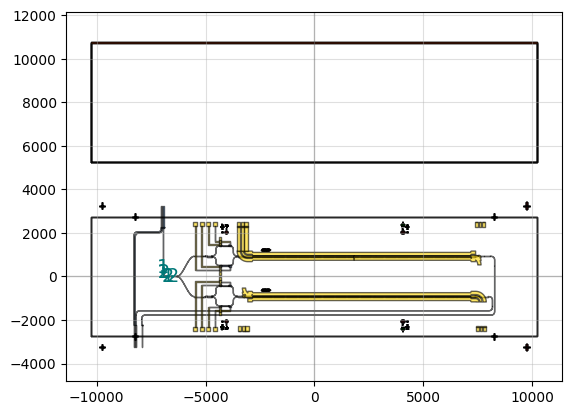

In [7]:
dev_name = 'AMF_Visimod_2x2_v1'

#EBL markers
marker_dice_x = chip_sizex/2-1500
marker_dice_y = chip_sizey/2-facet_length1/2

marker1_x = 6100-1850
marker1_y = 2500
marker2_x = marker1_x - 200
marker2_y = marker1_y - 150

marker3_y = marker2_y - 150
marker4_y = marker3_y - 150
marker5_y = marker1_y + 150

D13.add_ref(marker_dice_array(marker_x = chip_sizex/2, marker_y = chip_sizey/2, layer = layer_marker))
D13.add_ref(marker_dice_array(marker_x = marker_dice_x, marker_y = marker_dice_y, layer = layer_marker))
D.add_ref(D13)

D12.add_ref(marker1_array(marker_x = marker1_x, marker_y = marker1_y,arm_length = 10, arm_width = 20, layer = layer_marker))
D12.add_ref(marker1_array(marker_x = marker2_x, marker_y = marker1_y,arm_length = 10, arm_width = 3, layer = layer_marker))
D12.add_ref(marker1_array(marker_x = marker1_x, marker_y = marker3_y,arm_length = 10, arm_width = 20, layer = layer_marker))
D12.add_ref(marker1_array(marker_x = marker2_x, marker_y = marker3_y,arm_length = 10, arm_width = 3, layer = layer_marker))
D12.add_ref(marker1_array(marker_x = marker1_x, marker_y = marker4_y,arm_length = 50, arm_width = 15, layer = layer_marker))
D12.add_ref(inv_marker1_array(marker_x = marker2_x, marker_y = marker4_y,arm_length = 50, arm_width = 15, layer = layer_marker))

D12.add_ref(calipermarker_array(marker_x = marker1_x, marker_y = marker2_y, arm_length = 50, arm_width=2, num_notches=7, layer1= layer_marker, layer2=layer_test))
D12.add_ref(DLalignmarker_array(marker_x = marker2_x, marker_y = marker2_y, arm_length = 50, layer1= layer_marker, layer2=layer_test))
# D12.move([1500,0])
D.add_ref(D12)

#Deep etching mask
Etchwidth=10
Detchmask1= D14.add_ref(pg.rectangle(size = (chip_sizex+1000-Etchwidth, marker_dice_y*2-Etchwidth), layer = layer_Detch))
Detchmask2 = D15.add_ref(pg.outline(D14, distance = Etchwidth, precision = 1e-6, layer = layer_Detch))
Detchmask2.center=[0,0]
D.add_ref(D15)

# # device name
# file_name = dev_name +'.gds'
# label_dev = D.add_ref(pg.text(file_name, size = 200, justify = 'center', layer = layer_label))
# label_dev.center = [1500,chip_sizey*0.35]

# D.flatten()
# pattern_area = D.area()*10**-6 # unit mm^2

qp(D)